##Importing libraries

In [152]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


##Uploading dataset

In [153]:
df = pd.read_csv("medical_insurance.csv")

##Encoding using OneHotEncoder
###OneHotEncoder:
**OneHotEncoder** is a data preprocessing technique that converts **categorical variables** into a **binary (0 or 1)** format, creating separate columns for each category.
It allows machine learning models to process categorical data by representing each category as a unique vector.


In [154]:
df = pd.get_dummies(df, columns=['gender', 'region', 'discount_eligibility'], drop_first=True)

##Segregate dataset into input X and Output Y

In [155]:
X = df.drop(['expenses'], axis=1)
y = df['expenses']

##Splitting dataset for Testing our model

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Feature Scaling

In [157]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Training dataset using Linear Regression

In [158]:
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

##Predicting & Evaluating
###R²:
R² (R-squared) is a statistical metric that measures how well a regression model explains the variability of the target variable.
It shows the proportion of variance in the target that is explained by the model.
Range: 0 to 1 (higher is better).
###MAE:
**MAE (Mean Absolute Error)** is a regression metric that measures the **average absolute difference** between actual and predicted values.
It shows how much, on average, the predictions deviate from the true values.
* **Formula:**
  Average of |Actual − Predicted|
* **Lower MAE** means better model accuracy.

###MSE:
**MSE (Mean Squared Error)** is a regression metric that measures the **average of the squared differences** between actual and predicted values.
* It gives more weight to larger errors (due to squaring).
* Lower MSE indicates better model performance.
**Formula:**
Average of (Actual − Predicted)²

###RMSE:
**RMSE (Root Mean Squared Error)** is a regression metric that measures the **square root of the average squared differences** between actual and predicted values.
* It represents the **standard deviation of prediction errors**.
* Lower RMSE indicates better model accuracy.
* It is in the **same unit** as the target variable.
**Formula:**
√(Average of (Actual − Predicted)²)



In [159]:
y_pred = model.predict(X_test_scaled)
print("Test R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Test R² Score: 0.9937815731564869
MAE: 189.26509552238764
MSE: 965402.8932294798
RMSE: 982.5491810741485


##Visualizing Random Forest regression results

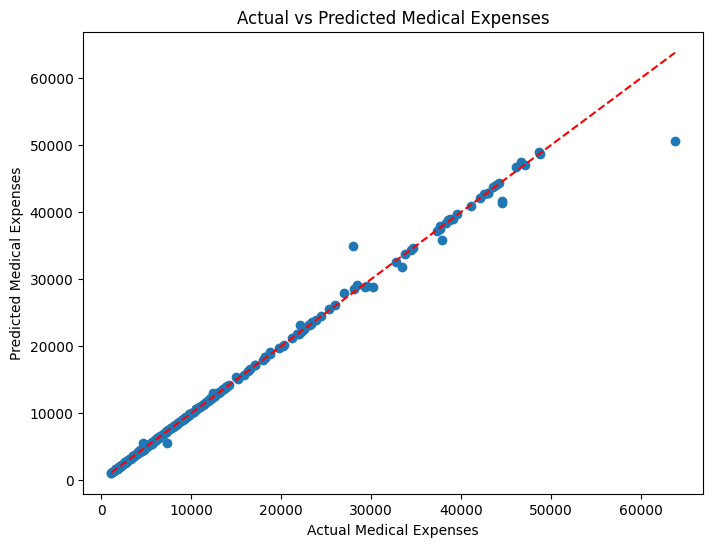

In [160]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Medical Expenses')
plt.ylabel('Predicted Medical Expenses')
plt.title('Actual vs Predicted Medical Expenses')
plt.show()

##Evaluating and Validating model

In [171]:
y_train_pred = model.predict(X_train_scaled)
print("Train R² Score:", r2_score(y_train, y_train_pred))
print("Test R² Score:", r2_score(y_test, y_pred))
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Mean Cross-Validation R² Score:", np.mean(cv_scores))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape, "%")

Train R² Score: 0.9988603417727634
Test R² Score: 0.9937815731564869
Cross-Validation R² Scores: [0.99877168 0.99437263 0.99099371 0.98453571 0.98923596]
Mean Cross-Validation R² Score: 0.9915819375457329
MAPE: 0.9158569729937085 %


##Predicting Insurance Expenses for Custom Input

In [172]:
new_data = pd.DataFrame([{
    'age': 40,
    'bmi': 30.0,
    'children': 2,
    'premium': 12000,
    'gender_male': 1,
    'region_northwest': 0,
    'region_southeast': 1,
    'region_southwest': 0,
    'discount_eligibility_yes': 1
}])

new_data_scaled = scaler.transform(new_data)
predicted_expenses = model.predict(new_data_scaled)
print("Predicted Expenses for New Data:", predicted_expenses[0])

Predicted Expenses for New Data: 41387.78769999998
